## Load data from Mongodb to python

In [1]:
import pymongo

client = pymongo.MongoClient("localhost", 27017)
db = client['tripadvisor']
collection = db['user']

In [6]:
for x in db.user.find({"user":"roryjdoyle"}):
    print(x)

{'_id': ObjectId('599ac78a16d1290022b1741f'), 'review': {'date': '13 August 2017', 'tool': 'pc', 'cnt': 'Another Hard Rock Hotel but unfortunately located way out over in Sentosa Island being far away from Orchard Road. Good if you want to sit on a beach all day but if you want to be in the Orchard Road / shopping areas this will', 'title': 'Located on Sentosa'}, 'user_year': 2013, 'count': {'contribution': '712', 'city': '174', 'photo': '223', 'vote': '281'}, 'rate': 30, 'age': '50-64', 'uid': '53914737C20758B841D5356ED067D5B1', 'level': '6', 'distribution': {'Poor': '42', 'Terrible': '3', 'Very good': '360', 'Average': '261', 'Excellent': '47'}, 'user': 'roryjdoyle', 'gender': 'man', 'country': 'Kuala Lumpur, Malaysia'}


In [7]:
client.close()

In [140]:
data = []
for x in db.user.find():
    data.append(x)

print(len(data))
data[3]

1534


{'_id': ObjectId('599ac78a16d1290022b17422'),
 'age': 'none',
 'count': {'city': '1', 'contribution': '1', 'photo': '0', 'vote': '0'},
 'country': 'Singapore, Singapore',
 'distribution': {'Average': '0',
  'Excellent': '0',
  'Poor': '0',
  'Terrible': '0',
  'Very good': '0'},
 'gender': 'none',
 'level': 'none',
 'rate': 40,
 'review': {'cnt': 'Hi, we had a fab holiday staying one night each in the suite n deluxe room. The sea and cable car view was amazing. Service from guest services especially Jayson was warm and excellent. We would surely return',
  'date': '10 August 2017',
  'title': 'Fantastic',
  'tool': 'pc'},
 'uid': '5AE04A17394F0D431C427FAD65FC15EE',
 'user': 'yeechan1s',
 'user_year': 2012}

In [141]:
import pandas as pd

for element in data: 
    del element['_id'] 
    del element['uid']
    
df = pd.DataFrame(data)
df.head()

,age,count,country,distribution,gender,level,rate,review,user,user_year
0,50-64,"{'vote': '281', 'city': '174', 'contribution':...","Kuala Lumpur, Malaysia","{'Excellent': '47', 'Poor': '42', 'Average': '...",man,6,30,"{'title': 'Located on Sentosa', 'cnt': 'Anothe...",roryjdoyle,2013
1,none,"{'vote': '0', 'city': '1', 'contribution': '1'...","Singapore, Singapore","{'Excellent': '0', 'Poor': '0', 'Average': '0'...",none,none,50,"{'title': 'MONEY WELL SPENT', 'cnt': 'booked t...",lorifX8088AW,2017
2,35-49,"{'vote': '160', 'city': '71', 'contribution': ...","Surrey, United Kingdom","{'Excellent': '16', 'Poor': '9', 'Average': '8...",woman,5,50,"{'title': 'Amazing hotel!', 'cnt': 'I was a bi...",Sordnaxela,2006
3,none,"{'vote': '0', 'city': '1', 'contribution': '1'...","Singapore, Singapore","{'Excellent': '0', 'Poor': '0', 'Average': '0'...",none,none,40,"{'title': 'Fantastic', 'cnt': 'Hi, we had a fa...",yeechan1s,2012
4,none,"{'vote': '0', 'city': '193', 'contribution': '...",Reading,"{'Excellent': '5', 'Poor': '0', 'Average': '0'...",none,2,40,"{'title': 'Fantastic hotel and location', 'cnt...",Anne A,2011


In [100]:
# load traveler type data
rd = pd.read_json("tripadv2.json")
rd.shape

(1565, 12)

In [102]:
rd.traveler_type.value_counts()

Families    930
Couples     344
Friends     134
Business    121
Solo         36
Name: traveler_type, dtype: int64

In [107]:
rd[["user","traveler_type"]].head()

,user,traveler_type
0,lorifX8088AW,Families
1,Sordnaxela,Families
2,roryjdoyle,Families
3,jepisco,Families
4,yeechan1s,Families


In [109]:
trv_type = pd.concat([rd.user, pd.get_dummies(rd.traveler_type)], axis=1)
trv_type.head()

,user,Business,Couples,Families,Friends,Solo
0,lorifX8088AW,0,0,1,0,0
1,Sordnaxela,0,0,1,0,0
2,roryjdoyle,0,0,1,0,0
3,jepisco,0,0,1,0,0
4,yeechan1s,0,0,1,0,0


In [112]:
trv = trv_type.groupby('user').sum(axis = 1)
print(trv.shape)
trv.head()

(1534, 5)


,Business,Couples,Families,Friends,Solo
user,,,,,
-this-is-me-123456,1,0,0,0,0
109francesb,0,0,1,0,0
158jkwan,0,1,0,0,0
2014FpvGt,0,0,1,0,0
201Mandy,0,0,1,0,0


## Exploratory data analysis

In [98]:
df.age.value_counts().sort_index()

13-17      1
18-24     30
25-34    204
35-49    336
50-64     76
65+        4
none     883
Name: age, dtype: int64

In [27]:
df.gender.value_counts()

none     781
man      406
woman    347
Name: gender, dtype: int64

In [28]:
df.rate.value_counts()

40    538
30    400
50    306
20    152
10    138
Name: rate, dtype: int64

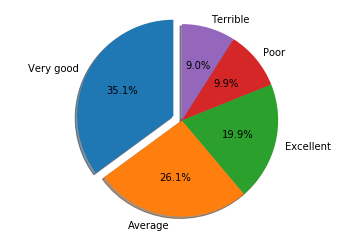

In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.simplefilter('ignore')
%matplotlib inline

labels = ['Very good','Average','Excellent','Poor','Terrible']
sizes = df['rate'].value_counts().tolist()
explode = (0.1, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [142]:
# generate a new column

data = df
data['rating'] = "good"
data.loc[data.rate<40, "rating"] = "bad"

data.rating.value_counts()

good    844
bad     690
Name: rating, dtype: int64

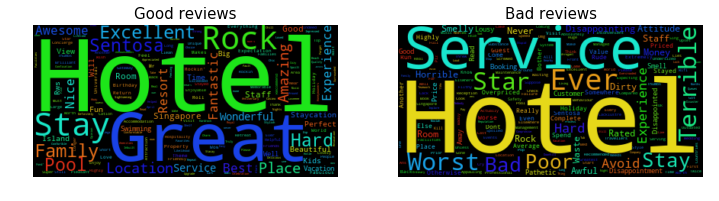

In [51]:
from wordcloud import WordCloud

# d1 = data[data.rating == "good"]
d1 = data[data.rate == 50]
d2 = data[data.rate == 10]

text1 = " ".join(x['title'] for x in d1.review).title()
text2 = " ".join(x['title'] for x in d2.review).title()

wordcloud1 = WordCloud().generate(text1)
wordcloud2 = WordCloud().generate(text2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Good reviews', fontsize=15)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Bad reviews', fontsize=15)

In [143]:
# the review date

rev_year = [x['date'] for x in data.review]
rev_year[:5]

['13 August 2017',
 '14 August 2017',
 '19 February 2017',
 '10 August 2017',
 '8 August 2017']

In [238]:
from datetime import datetime

date2 = [datetime.strptime(x, "%d %B %Y") for x in rev_year]
print(date2[:2])
print(max(date2))
print(min(date2))

[datetime.datetime(2017, 8, 13, 0, 0), datetime.datetime(2017, 8, 14, 0, 0)]
2017-08-15 00:00:00
2010-01-28 00:00:00


In [239]:
# convert date to year

date2 = [x.year for x in date2]
pd.Series(date2).value_counts().sort_index()

2010     53
2011     78
2012    188
2013    233
2014    248
2015    277
2016    311
2017    146
dtype: int64

## Predictive model

In [145]:
# prepare data for user contributions

df2 = pd.DataFrame(data['count'].tolist())
df2.city = [int(x.replace(",", "")) for x in df2.city]
df2.contribution = [int(x.replace(",", "")) for x in df2.contribution]
df2.photo = [int(x.replace(",", "")) for x in df2.photo]
df2.vote = [int(x.replace(",", "")) for x in df2.vote]

print(df2.describe())
df2.head(5)

              city  contribution        photo        vote
count  1534.000000   1534.000000  1534.000000  1534.00000
mean     48.593872     39.876141    36.570404    27.04498
std      77.301445     75.309834   162.405342    81.11937
min       0.000000      1.000000     0.000000     0.00000
25%       5.000000      6.000000     0.000000     3.00000
50%      19.000000     18.000000     2.000000    11.00000
75%      58.750000     43.000000    18.000000    27.00000
max     892.000000   1193.000000  2832.000000  2479.00000


,city,contribution,photo,vote
0,174,712,223,281
1,1,1,0,0
2,71,52,0,160
3,1,1,0,0
4,193,6,0,0


In [240]:
# prepare data for user review distribution

dt2 = pd.DataFrame(data['distribution'].tolist())
dt2 = dt2.astype(int)
dt2['total'] = dt2.sum(axis=1)
dt2['good_pct']= dt2[["Very good","Excellent"]].sum(axis=1) / dt2.total
dt2['good_pct'] = dt2['good_pct'].fillna(0)
dt2.head(5)

,Average,Excellent,Poor,Terrible,Very good,total,good_pct
0,261,47,42,3,360,713,0.570827
1,0,0,0,0,0,0,0.000000
2,8,16,9,5,14,52,0.576923
3,0,0,0,0,0,0,0.000000
4,0,5,0,0,1,6,1.000000


In [147]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 7 columns):
Average      1534 non-null int64
Excellent    1534 non-null int64
Poor         1534 non-null int64
Terrible     1534 non-null int64
Very good    1534 non-null int64
total        1534 non-null int64
good_pct     1534 non-null float64
dtypes: float64(1), int64(6)
memory usage: 84.0 KB


In [58]:
dt2[["Very good","Excellent"]].head()

,Very good,Excellent
0,360,47
1,0,0
2,14,16
3,0,0
4,1,5


In [75]:
pd.get_dummies(data.gender).head(5).drop('none', axis = 1)

,man,woman
0,1,0
1,0,0
2,0,1
3,0,0
4,0,0


In [76]:
pd.get_dummies(data.age).head(5).drop('none', axis = 1)

,13-17,18-24,25-34,35-49,50-64,65+
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [148]:
data.age = pd.Categorical(data.age, ordered = True)
data.age.head()

0    50-64
1     none
2    35-49
3     none
4     none
Name: age, dtype: category
Categories (7, object): [13-17 < 18-24 < 25-34 < 35-49 < 50-64 < 65+ < none]

In [149]:
# convert age groups into numbers according to their order above

data.age = data.age.cat.codes
data.age.head()

0    4
1    6
2    3
3    6
4    6
Name: age, dtype: int8

In [313]:
data.age.value_counts().sort_index(ascending = True)

0      1
1     30
2    204
3    336
4     76
5      4
6    883
Name: age, dtype: int64

In [314]:
tool = pd.Series([x['tool'] for x in data.review])
print(tool.value_counts())
pd.get_dummies(tool, drop_first=False).head(5)

pc        1174
mobile     360
dtype: int64


,mobile,pc
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [241]:
# combine all features together

t1 = dt2[['total','good_pct']]
t2 = pd.get_dummies(tool, drop_first=True)
# t3 = pd.get_dummies(data.age).drop('none', axis = 1)
t3 = data.age
t4 = pd.get_dummies(data.gender).drop('none', axis = 1)
t5 = df2

dt = pd.concat([t1, t2, t3, t4, t5], axis=1)
dt['rev_date'] = date2
dt['rating'] = data.rating
dt.head()

,total,good_pct,pc,age,man,woman,city,contribution,photo,vote,rev_date,rating
0,713,0.570827,1,4,1,0,174,712,223,281,2017,bad
1,0,0.000000,1,6,0,0,1,1,0,0,2017,good
2,52,0.576923,1,3,0,1,71,52,0,160,2017,good
3,0,0.000000,1,6,0,0,1,1,0,0,2017,good
4,6,1.000000,1,6,0,0,193,6,0,0,2017,good


In [242]:
# renew the index

user_idx = df.user.tolist()
dt.index = user_idx
dt.head()

,total,good_pct,pc,age,man,woman,city,contribution,photo,vote,rev_date,rating
roryjdoyle,713,0.570827,1,4,1,0,174,712,223,281,2017,bad
lorifX8088AW,0,0.000000,1,6,0,0,1,1,0,0,2017,good
Sordnaxela,52,0.576923,1,3,0,1,71,52,0,160,2017,good
yeechan1s,0,0.000000,1,6,0,0,1,1,0,0,2017,good
Anne A,6,1.000000,1,6,0,0,193,6,0,0,2017,good


In [243]:
# combine dt with traveler type data, joining by index

dt2 = pd.concat([dt, trv], axis=1)
print(dt2.shape)
dt2.head()

(1534, 17)


,total,good_pct,pc,age,man,woman,city,contribution,photo,vote,rev_date,rating,Business,Couples,Families,Friends,Solo
-this-is-me-123456,96,0.593750,1,3,1,0,86,96,0,36,2017,bad,1,0,0,0,0
109francesb,26,0.884615,1,6,0,0,15,26,0,9,2013,bad,0,0,1,0,0
158jkwan,5,0.400000,0,6,0,0,4,5,1,1,2015,bad,0,1,0,0,0
2014FpvGt,229,0.733624,1,3,1,0,409,229,571,426,2015,bad,0,0,1,0,0
201Mandy,0,0.000000,1,6,0,0,3,2,0,5,2014,bad,0,0,1,0,0


In [247]:
# split into train and test data

X = dt2.drop("rating", axis = 1).values
y = dt2.rating.values

# random train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1227, 16)
(307, 16)


In [310]:
# modeling using random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators = 10, max_features = 7, max_depth=10, random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.700325732899


In [311]:
print(clf.feature_importances_)

[ 0.08252086  0.30584678  0.01520036  0.02701553  0.01721035  0.01478562
  0.1263931   0.0986934   0.0879072   0.10745081  0.06882858  0.01248129
  0.0122771   0.00795586  0.01006824  0.00536491]


In [312]:
# feature importance

imp = pd.Series(clf.feature_importances_, index = dt2.drop("rating", axis = 1).columns)
imp.sort_values(ascending = False)

good_pct        0.305847
city            0.126393
vote            0.107451
contribution    0.098693
photo           0.087907
total           0.082521
rev_date        0.068829
age             0.027016
man             0.017210
pc              0.015200
woman           0.014786
Business        0.012481
Couples         0.012277
Friends         0.010068
Families        0.007956
Solo            0.005365
dtype: float64

## Visualization of importance features